In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Import the necessary libraries.
# Organize the dataframe and select columns that are needed for observation. After selection set values for X and y respectively.

In [40]:
# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [41]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
# After importing the dataset, inspect the columns

In [42]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# After column inspection, take a view of the dataframe head (a sample of what the dataframe is)

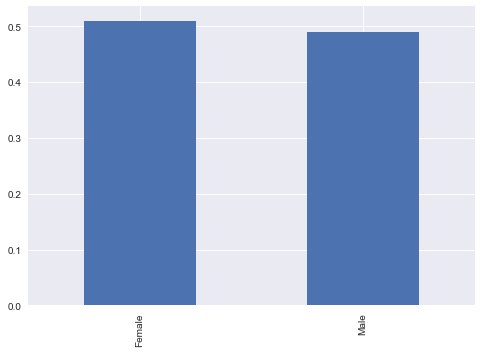

In [43]:
_= df['Gender'].value_counts('Purchased').plot(kind='bar')
plt.show()

In [ ]:
# Initial exploratory analysis of Gender on Purchases to see if there is any significant impact. 
# It can be concluded that there is no significant impcat of Gender on Purchases.

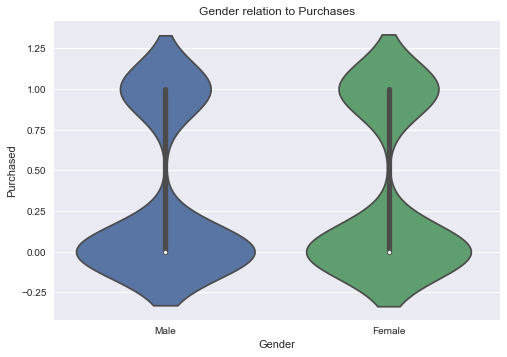

In [46]:
_= sns.violinplot(x= 'Gender', y= 'Purchased', data= df)
_= plt.title('Gender relation to Purchases')
plt.show()

In [ ]:
# Gender plotted against overall Purchased as we can see the comparison of Male to Female Purchases is not significantly different.
# The bars that are blue show the overall purchases and are the same in both sets. The green bars are the Purchases based on Gender.
# Gender does not display a significant impact on Purchase as there is only a slight difference between male and female purchasing occurence.
# The slight significance is that females have a slightly higher purchase rate occurrence than males but it is not enought to preclude targeting of females only.

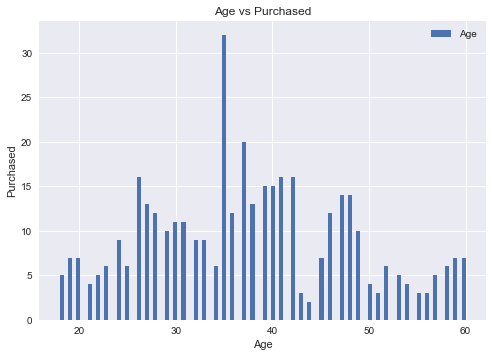

In [47]:
_= df.plot( x='Purchased', y='Age',bins=100, kind='hist')
_= plt.xlabel('Age')
_= plt.ylabel('Purchased')
_= plt.title('Age vs Purchased')
plt.show()

In [ ]:
# In this histogram we can observe the impact of Age on Purchases. 
# We can see that there is distinct variations in purchasing volume based on age. 
# There is a very high peak of accurence for the mid 30's age group. 
# Overall from mid 20's to late 40's there seems to be the majority of the Purchases which would be one of the parameters for ad deployment.

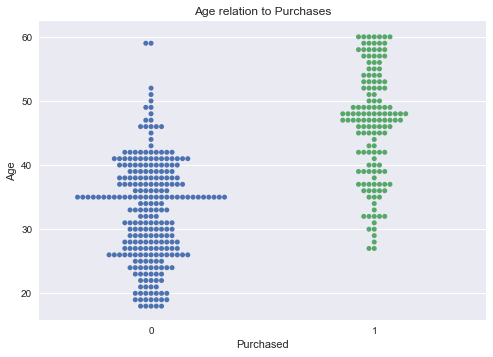

In [44]:
_= sns.swarmplot(x= 'Purchased', y= 'Age', data= df)
_= plt.title('Age relation to Purchases')
plt.show()

In [ ]:
# Exploring the next factor, Age in repation to purchases.
# Here it can be seen that there are dense ranges of both Purchased and Not Purchased of Age.
# Some concern is the density of the Not Purchased frequency at the mid-30's. 
# This is excessively high and should be considered for evaluation. 

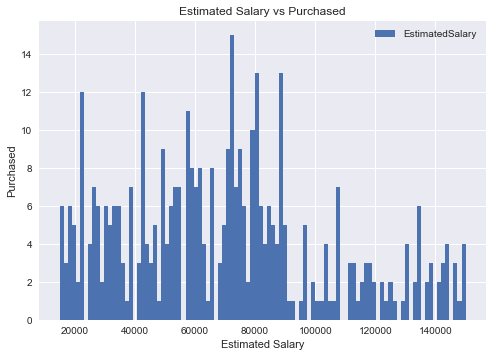

In [48]:
_= df.plot( x='Purchased', y='EstimatedSalary',bins= 100, kind='hist')
_= plt.xlabel('Estimated Salary')
_= plt.ylabel('Purchased')
_= plt.title('Estimated Salary vs Purchased')
plt.show()

In [ ]:
# In this histogram we can observe the impact of Estimated Salary on Purchases. 
# We would assume that Estimated Salaray would be a key indicator based on purchasing power and ability but we can clearly see that there is a threshold to that statement.
# From $20,000 to $80,000 range we can see the bulk of purchases being made as well as there volumes. 
# It would not be a bad idea to still include the higher salaries in the target for ad deployment but if we were to exclusively focus on volume and number of purchases the observed range would be the ideal.


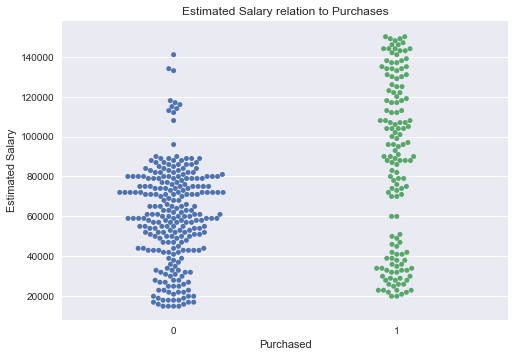

In [45]:
_= sns.swarmplot(x= 'Purchased', y= 'EstimatedSalary', data= df)
_= plt.ylabel('Estimated Salary')
_= plt.title('Estimated Salary relation to Purchases')
plt.show()

In [ ]:
# From the swarm plot we see a consistent distribution of Purchased in relation to Estimated Salary.
# There is still a density in the Not Purchased that should be reconsidered on ad deployment.
# We can surmise that the Estimated Salary is of key interest to the campaign success.

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [51]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [54]:
cm

array([[64,  4],
       [ 3, 29]])

In [55]:
# Accuracy
Accuracy = (64+29)/(64+4+3+29)
print ('Accuracy=', Accuracy)

Accuracy= 0.93


In [ ]:
# From the confusion matrix we can observe that the number of False positives and False negatives is relatively low which is to say that our data is relatively accurate as there is a 93% accuracy.
# The data we are observing has an accuracte and correlating value.

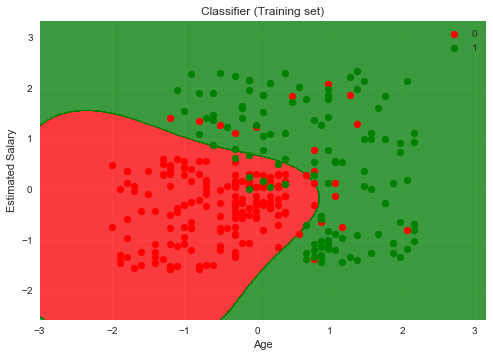

In [56]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# The observations of our training set are the values from our actual data which reflect some inconsistencies and overlaps in the Gaussian observation.
# The red is non-purchases and green are purchases, we can instanlty see that the fit has some inconsistencies in our actual data.

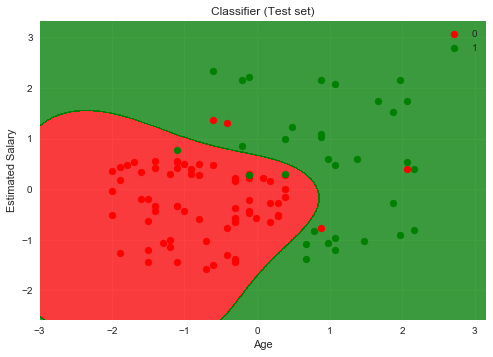

In [57]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# This is our predictive analysus with a simulated observation from our training set. 
# Here we can visualize a more accurate fit of the Gaussian kernel on our test set. 
# There are some observations that overlap but they are far fewer and more consistent to the actual curve. 
# These outliers are consistent with our confusion matrix predictions. 
# We can safely assume that the classifiers of Age and Estimated Salary do have significane with Purchases. 
# Conclusion  = Optimizing our social network ads to target specific audiences would optimize our campaign with correlation to Purchases. 